In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [3]:
AAA = eclipse_DVH('Case6_AAA.txt')
AXB = eclipse_DVH('Case6_Dm.txt')

Case6_AAA.txt loaded 	 patID = Case6_AAA	 Prescription [Gy] = 65.010
Case6_Dm.txt loaded 	 patID = Case6_Dm	 Prescription [Gy] = 65.010


In [4]:
AXB.DVH_df.columns

Index(['Rt Par edit_P5', 'Pseudo ring_P1', 'Pseudo Oral Cav5',
       'Pseudo Midline_5', 'PTV2 edit_P5', 'PTV2_P5', 'Right Couch Bar1',
       'ARTEFACT_P2', '65gy cooler_P', 'PTV1 edit_P5', 'PTV1_P5',
       'Lt Par edit_P5', 'BS + 5mm_P5', 'BS + 3mm_P4', 'BODY_P5', 'CTV60_P',
       'CTV65_P4', 'R Optic Nerve_P4', 'L Optic Nerve_P4', 'R Lens_P5',
       'L Lens_P5', 'R Orbit_P5', 'L Orbit_P5', 'R Parotid_P5', 'L Parotid_P5',
       'GTVnode_P', 'Brain Stem_P5', 'Spinal Cord_P5', 'SC + 3mm_P5',
       'SC + 5mm_P5', 'Pseudo PTV1_P5', 'Pseudo PTV2_P5', 'Left Couch Bar_1',
       '60 cooler_P', 'both ptvs_P1', '65 coverer_P'],
      dtype='object')

(50, 75)

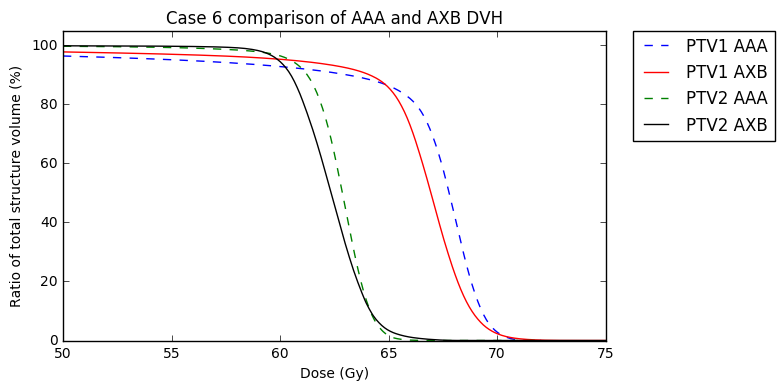

In [6]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'PTV1_P5'
plt.plot(AAA.DVH_df[structure], label="PTV1 AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV1 AXB",  color='r' )

structure = 'PTV2_P5'
plt.plot(AAA.DVH_df[structure], label="PTV2 AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV2 AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 6 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,75])

In [7]:
Comparison_df = pd.concat([ AAA.metrics_df['PTV1_P5'], 
                            AXB.metrics_df['PTV1_P5'], 
                           
                           AAA.metrics_df['PTV2_P5'], 
                           AXB.metrics_df['PTV2_P5']], 
                           axis=1)
Comparison_df

,PTV1_P5,PTV1_P5,PTV2_P5,PTV2_P5
Metric,,,,
Structure,PTV1_P5,PTV1_P5,PTV2_P5,PTV2_P5
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case6_AAA,Case6_Dm,Case6_AAA,Case6_Dm
Course,1,1,1,1
Volume [cmÂ³],321.1,321.1,159.4,159.4
Dose Cover.[%],100.0,100.0,100.0,100.0
Sampling Cover.[%],100.0,100.0,100.0,100.0
Min Dose [%],0.0,0.0,17.3,22.1
Max Dose [%],111.0,117.5,103.4,106.2
